# Практическая работа №2: Исследование подгрупп сетей. Сети аффилированности.

---



Выполнил студент гр. 3385 Комаренко Тимофей Алексеевич. Вариант №9.

## Цель работы

Овладеть навыками работы с математическими пакетами для исследования подгрупп в социальных сетях, а также моделирования, отображения
и анализа сетей аффилированности.


## Основные теоретические положения

### Основные определения

#### Социоматрица
Социоматрица $A$ - это квадратная матрица размера $g \times g$, где $g$ - количество акторов в сети. Элемент $a_{ij}$ принимает значение:
- $1$, если существует связь от актора $i$ к актору $j$
- $0$, если связь отсутствует

Для неориентированных сетей матрица симметрична: $a_{ij} = a_{ji}$

#### Список рёбер
Альтернативное представление сети в виде множества упорядоченных пар:
$E = \{(i,j) | a_{ij} = 1\}$

#### Плотность сети
Плотность $den$ неориентированной сети G вычисляется как:

$$den(G) = \frac{2L}{g(g-1)}$$

где $L$ - количество рёбер, $g$ - количество вершин.

#### Компоненты связности
Компонента связности - максимальное подмножество вершин, где существует путь между любой парой вершин.

#### Диаметр сети
Диаметр $diam$ - максимальное геодезическое расстояние между любой парой вершин в сети G:

$$diam(G) = \max_{i,j} d_{ij}$$

где $d_{ij}$ - длина кратчайшего пути между вершинами $i$ и $j$.

#### Коэффициент кластеризации
Локальный коэффициент кластеризации $Cl_i$ для вершины $i$ графа G:

$$Cl_i(G) = \frac{2N_i}{k_i(k_i-1)}$$

где $N_i$ - количество треугольников через вершину $i$, $k_i$ - степень вершины.

Глобальный коэффициент кластеризации:

$$Cl(G) = \frac{1}{n} \sum_{i=1}^n C_i$$

#### Двудольные сети

Сеть $G = (V, E)$, где $V = V_1 \cup V_2$, $V_1 \cap V_2 = \emptyset$, и все рёбра $e \in E$ соединяют вершины из разных множеств:
$$
E \subseteq \{(u,v) | u \in V_1, v \in V_2\}
$$


#### Гиперграф

Обобщение графа, в котором каждым ребером могут соединяться не два узла, а подмножество

$$
H = H(A, B)$$ где

$A$ - набор вершин

$B$ - набор гипер ребер


#### Проекции двудольной сети

- *Проекция на акторы* ($P_1$): $A_1 = B B^T - D_1$
- *Проекция на события* ($P_2$): $A_2 = B^T B - D_2$

где $D_1$, $D_2$ - диагональные матрицы степеней.


#### K-ядра

$k$-ядро - максимальный подграф, в котором каждый узел смежен не менее чем с k узлами в подграфе:

$$\deg(v) \geq k, ∀ v \in V$$


#### Отношение шансов

Для таблицы сопряженности:

| | Участвует в $j$ | Не участвует в $j$ |
|-|-----------------|-------------------|
| Участвует в $i$ | $a$ | $b$ |
| Не участвует в $i$ | $c$ | $d$ |

$$
OR = \frac{a \cdot d}{b \cdot c}, \quad LOR = \ln(OR)
$$




## Постановка задачи

С помощью математических пакетов и соответствующих библиотек провести анализ заданных социальных сетей на предмет подгрупп. Провести
исследование сети аффилированности CEO. Полученные результаты содержательно проинтерпретировать.


## Выполнение работы

### Загрузка необходимых библиотек

In [1]:
# Подключаем библиотеку для работы с графами
if (!require(igraph)) {
  install.packages("igraph")
  library(igraph)
}

# Подключаем библиотеку для работы с гиперграфами
if (!require(HyperG)) {
  install.packages("HyperG")
  library(HyperG)
}

if (!require(statnet)) {
  install.packages("statnet")
  library(statnet)
}

if (!require(intergraph)) {
  install.packages("intergraph")
  library(intergraph)
}

Loading required package: igraph

Warning message in library(package, lib.loc = lib.loc, character.only = TRUE, logical.return = TRUE, :
“there is no package called ‘igraph’”
Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)


Attaching package: ‘igraph’


The following objects are masked from ‘package:stats’:

    decompose, spectrum


The following object is masked from ‘package:base’:

    union


Loading required package: HyperG

Warning message in library(package, lib.loc = lib.loc, character.only = TRUE, logical.return = TRUE, :
“there is no package called ‘HyperG’”
Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘RcppEigen’, ‘mclust’, ‘proxy’, ‘RSpectra’, ‘gtools’


Loading required package: mclust

Package 'mclust' version 6.1.2
Type 'citation("mclust")' for citing this R package in publications.


Attaching package: ‘HyperG’


The following objects are masked from ‘package:igrap

###   florentine_business.csv

#### 1 Извлечение социоматрицы. Отображение сети с помощью алгоритма Камада-Каваи

              Acciaiuoli  Albizzi  Barbadori  Bischeri  Castellani  Ginori
Acciaiuoli             0        0          0         0           0       0
 Albizzi               0        0          0         0           0       0
 Barbadori             0        0          0         0           1       1
 Bischeri              0        0          0         0           0       0
 Castellani            0        0          1         0           0       0
 Ginori                0        0          1         0           0       0
 Guadagni              0        0          0         1           0       0
 Lamberteschi          0        0          0         1           1       0
 Medici                0        0          1         0           0       1
 Pazzi                 0        0          0         0           0       0
 Peruzzi               0        0          1         1           1       0
 Pucci                 0        0          0         0           0       0
 Ridolfi               0 

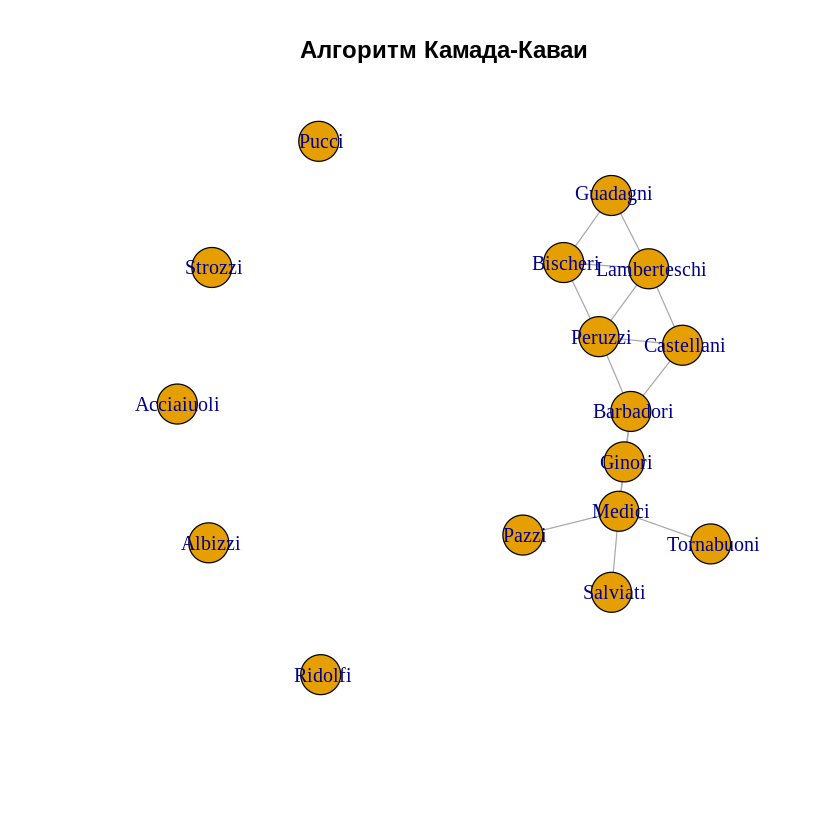

In [33]:
# Переменная хранит адрес файла florentine_business.csv
url <- "https://drive.google.com/file/d/1shboWsyEAABA1P2EM4CtN5Y6FeRiwZi3/view?usp=sharing"

url <- paste0("https://drive.google.com/uc?id=",
              gsub(".*/d/([^/]+).*", "\\1", url))

data <- read.csv(url,
                 header = FALSE,
                 skip = 1,           # пропуск первой строки с комментарием
                 sep = ",",
                 stringsAsFactors = FALSE)

# Создание временной матрицы, чтобы узнать размерность
temp_matrix <- data[-1, ]

# Создание социоматрицы
sociomatrix <- matrix(as.numeric(unlist(temp_matrix)),
                     nrow = nrow(temp_matrix),
                     ncol = ncol(temp_matrix))

# Извлечение названий семей из первой строки данных
family_names <- as.character(data[1, ])

# Установка названий
rownames(sociomatrix) <- family_names
colnames(sociomatrix) <- family_names
print(sociomatrix)

# Построение графа по социоматрице
g <- graph_from_adjacency_matrix(sociomatrix, mode = 'undirected')

# Алгоритм Фрюхтермана-Рейнгольда
plot(g, main = "Алгоритм Камада-Каваи", layout = layout_with_kk)

#### Выявление точек сочленения и мостов.

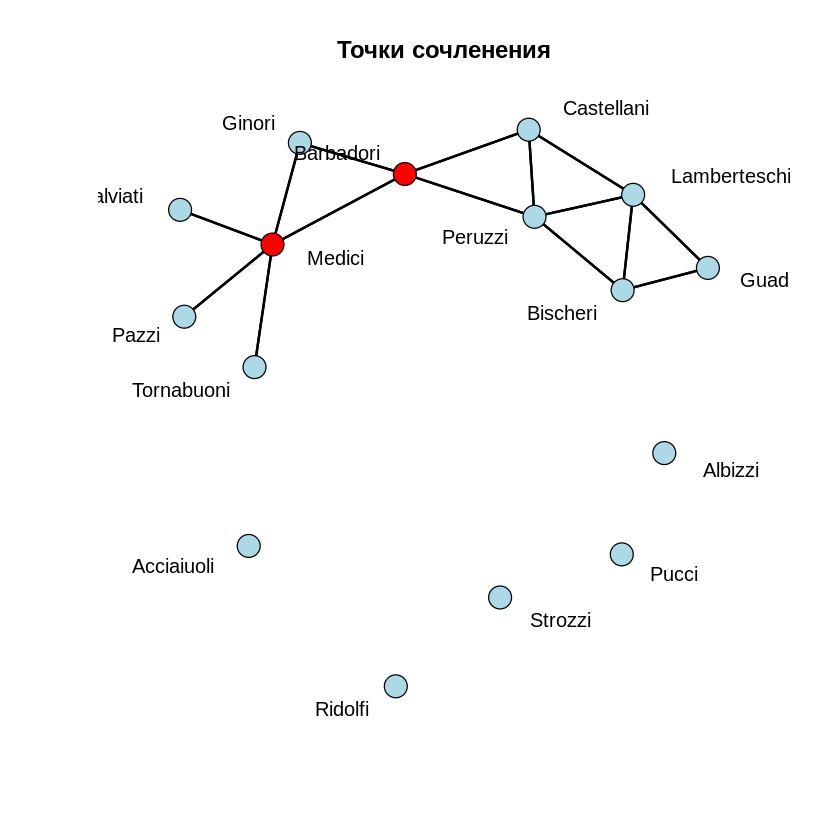

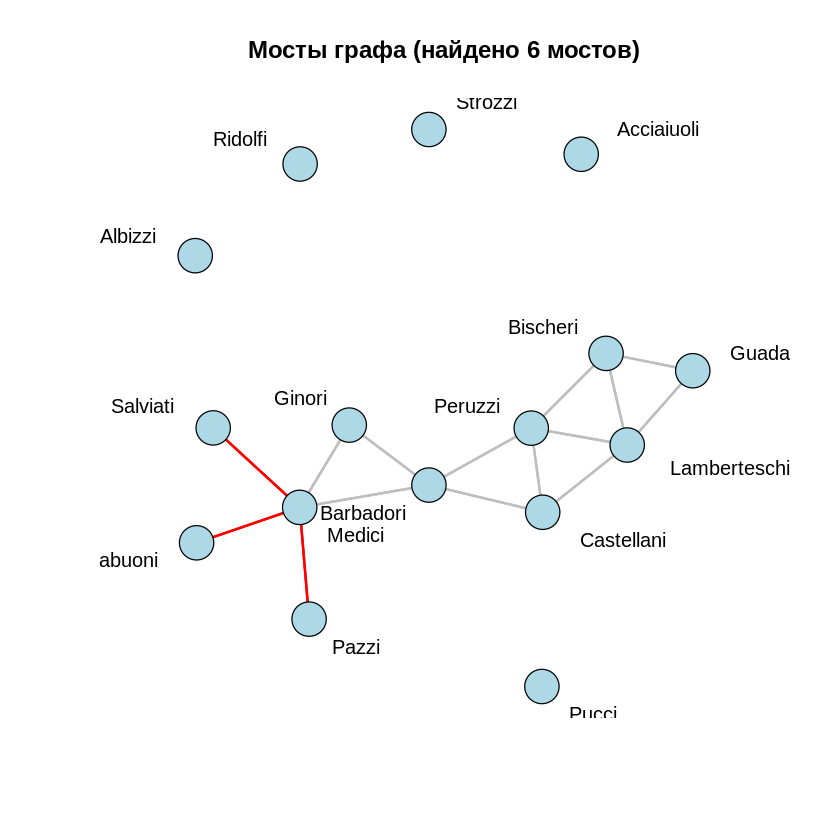

In [34]:
net1 <- network(sociomatrix, matrix.type = "adjacency")

articulation_points  <- cutpoints(net1, mode = "graph", return.indicator = TRUE)

gplot(net1, gmode = "graph", vertex.col = ifelse(articulation_points, "red", "lightblue"),
  displaylabels = TRUE, main = "Точки сочленения")


find_bridges <- function(dat, connected=c("strong", "weak")) { # удаляется ребро, если количество компонент связности выросло -- это мост
  edges_count <- network.edgecount(dat)
    comp_count <- components(dat)
    b_vec <- rep(FALSE, edges_count)
    for(i in 1:edges_count) {
      dat2 <- dat
      delete.edges(dat2, i)
      b_vec[i] <- (components(dat2) != comp_count)
    }
  return(b_vec)
}

bridge_edges <- find_bridges(net1)
# Если есть мосты, покажем их
if (sum(bridge_edges) > 0) {
  edges <- as.edgelist(net1)
}

gplot(net1,
      gmode = "graph",
      vertex.col = "lightblue",
      vertex.cex = 1.5,
      edge.col = ifelse(bridge_edges, "red", "gray"),
      jitter = FALSE,
      displaylabels = TRUE,
      main = paste("Мосты графа (найдено", sum(bridge_edges), "мостов)"))


####  Вычисление значений централизации для каждой меры

In [36]:
snet1 <- intergraph::asNetwork(g)

non_isolated_vertices <- which(degree(snet1) > 0)
snet1_connected <- get.inducedSubgraph(snet1, non_isolated_vertices)

size <- network.size(snet1_connected)
deg <- degree(snet1_connected)
closeness_cent <- closeness(snet1_connected, gmode = "graph")
between_cent <- betweenness(snet1_connected, gmode = "graph")

cat("Централизации для каждой меры:\n\n")

cat("Централизация по степени:\n")
C_D <- sum(max(deg) - deg) / ((size - 1) * (size - 2))
cat("C_D =", round(C_D, 4), "\n")

cat("Централизация по близости:\n")
C_С <- sum(max(closeness_cent) - closeness_cent) * (2*size - 3) / ((size - 1) * (size - 2))
cat("C_С =", round(C_С, 4), "\n")

cat("Централизация по посреднечиству:\n")
C_B <- sum(max(between_cent) - between_cent) * 2 / ((size - 1) * (size - 1) * (size - 2))
cat("C_B =", round(C_B, 4), "\n")

Централизации для каждой меры:

Централизация по степени:
C_D = 0.5556 
Централизация по близости:
C_С = 0.3535 
Централизация по посреднечиству:
C_B = 0.4422 


##### Вывод
Граф демонстрирует умеренную централизацию (0.556 по степени и 0.442 по посредничеству), что указывает на наличие ключевых вершин-хабов и мостовых узлов. Сеть не является ни полностью децентрализованной, ни чрезмерно централизованной — это смешанная структура с выраженными, но не абсолютными центрами влияния.

#### Вычисление k-ядер.

core_val
0 1 2 
5 3 8 

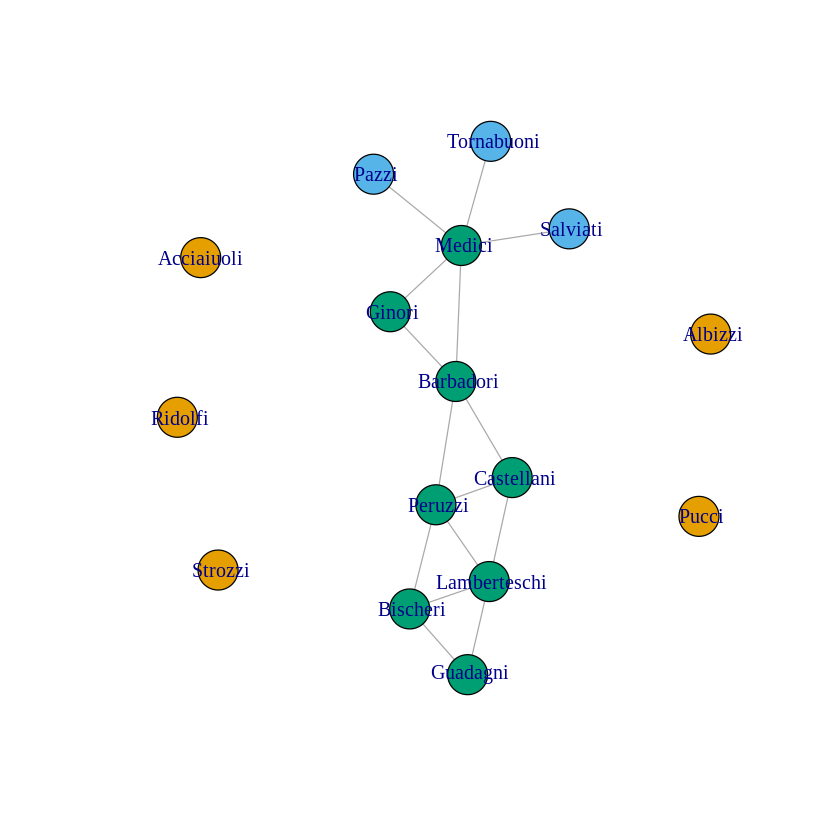

In [42]:
core_val <- coreness(g)

# Выводим сводку k-ядер и вершин
table(core_val)

g <- set_vertex_attr(g, name = "color", value = core_val + 1)

# Визуализрование графа с раскраской вершин
plot(g)

##### Вывод
Сеть имеет чёткую двухуровневую структуру. В её центре находится устойчивое 2-ядро из 8 узлов, образующих плотно связанную подгруппу. На периферии находятся слабосвязанные акторы: 3 узла имеют только по одной связи, а 5 узлов полностью изолированы. Это формирует картину активного коммуникационного ядра при наличии значительной периферии с низким уровнем вовлечённости.

#### Алгоритмы обнаружения сообществ

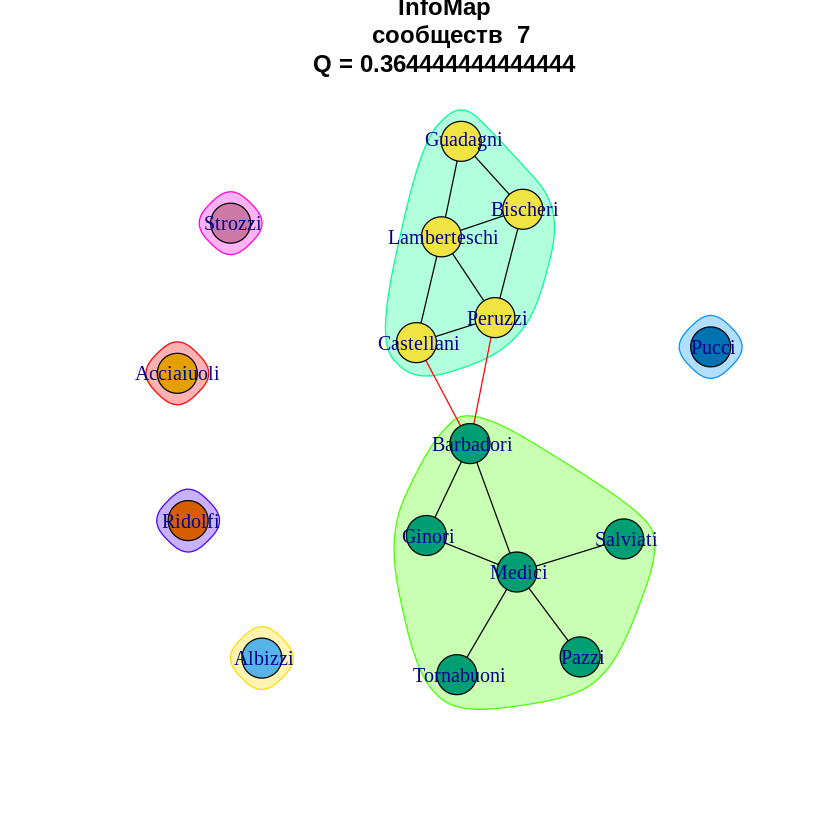

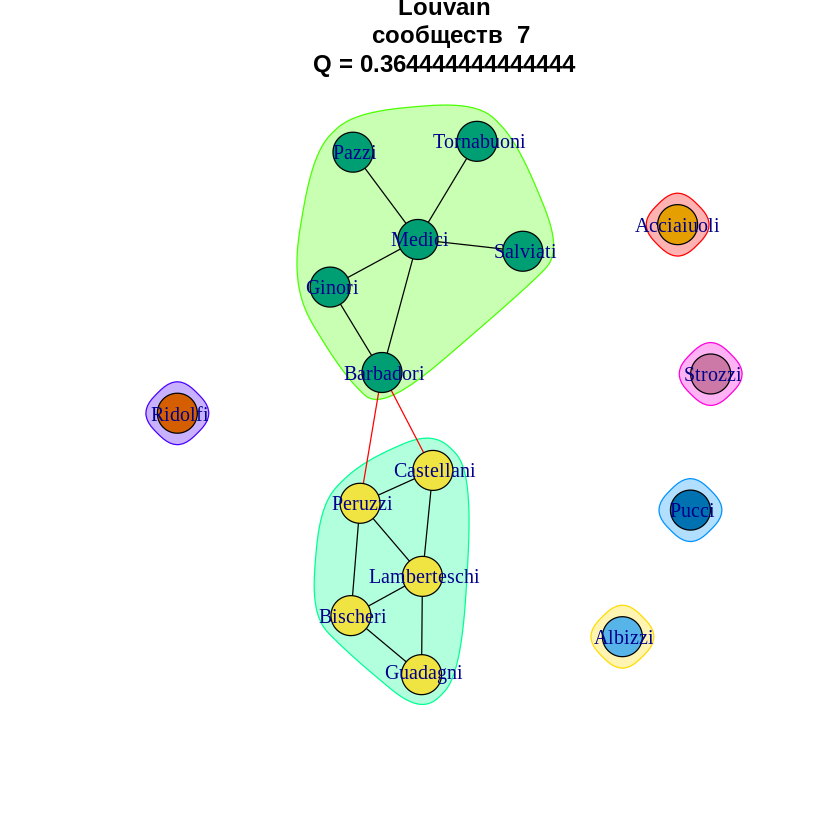

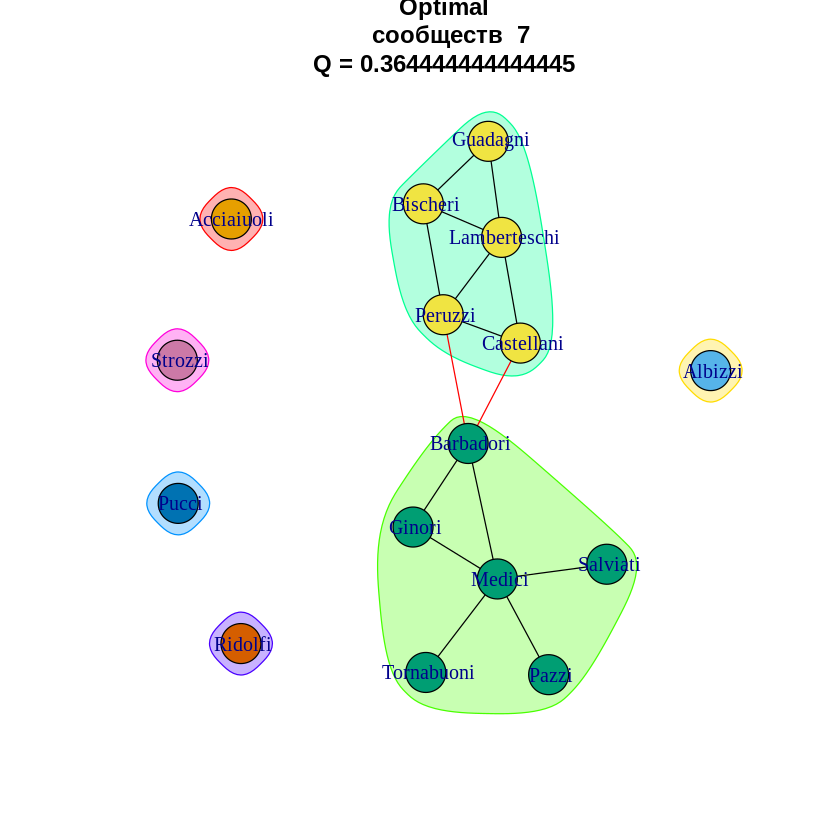

In [48]:
# Вычисление модулярностей
infomap_comm <- cluster_infomap(g)
louvain_comm <- cluster_louvain(g)
optimal_comm <- cluster_optimal(g)

# Вывод количества сообществ и модулярности
ic_str <- paste("InfoMap\n   сообществ ", length(infomap_comm), "\n Q =", modularity(infomap_comm), "\n")
lc_str <- paste("Louvain\n   сообществ ", length(louvain_comm), "\n Q =", modularity(louvain_comm), "\n")
oc_str <- paste("Optimal\n   сообществ ", length(optimal_comm), "\n Q =", modularity(optimal_comm), "\n")
plot(infomap_comm, g, main = ic_str)
plot(louvain_comm, g, main = lc_str)
plot(optimal_comm, g, main = oc_str)

##### Вывод
Все три алгоритма (InfoMap, Louvain и Optimal) выявили идентичную структуру сети: по 7 сообществ с модулярностью Q = 0.364.

InfoMap использует информационно-теоретический подход, эффективный для ориентированных и разрежённых сетей. Louvain применяет жадную оптимизацию модулярности, обеспечивая высокую скорость работы. Optimal находит глобальный максимум модулярности, но применим только для небольших графов.

Совпадение результатов трёх принципиально разных методов свидетельствует об устойчивой и чётко выраженной сообщественной структуре сети. Значение модулярности 0.364 подтверждает умеренно высокий уровень группировки вершин.



### ceo.csv

      [,1] [,2] [,3] [,4] [,5] [,6] [,7] [,8] [,9] [,10] [,11] [,12] [,13]
 [1,]    0    0    1    1    0    0    0    0    1     0     0     0     0
 [2,]    0    0    1    0    1    0    1    0    0     0     0     0     0
 [3,]    0    0    1    0    0    0    0    0    0     0     0     1     0
 [4,]    0    1    1    0    0    0    0    0    0     0     0     0     0
 [5,]    0    0    1    0    0    0    0    0    0     0     0     0     1
 [6,]    0    1    1    0    0    0    0    0    0     0     0     0     0
 [7,]    0    0    1    1    0    0    0    0    0     1     1     0     0
 [8,]    0    0    0    1    0    0    1    0    0     1     0     0     0
 [9,]    1    0    0    1    0    0    0    1    0     1     0     0     0
[10,]    0    0    1    0    0    0    0    0    1     0     0     0     0
[11,]    0    1    1    0    0    0    0    0    1     0     0     0     0
[12,]    0    0    0    1    0    0    1    0    0     0     0     0     0
[13,]    0    0    1    1

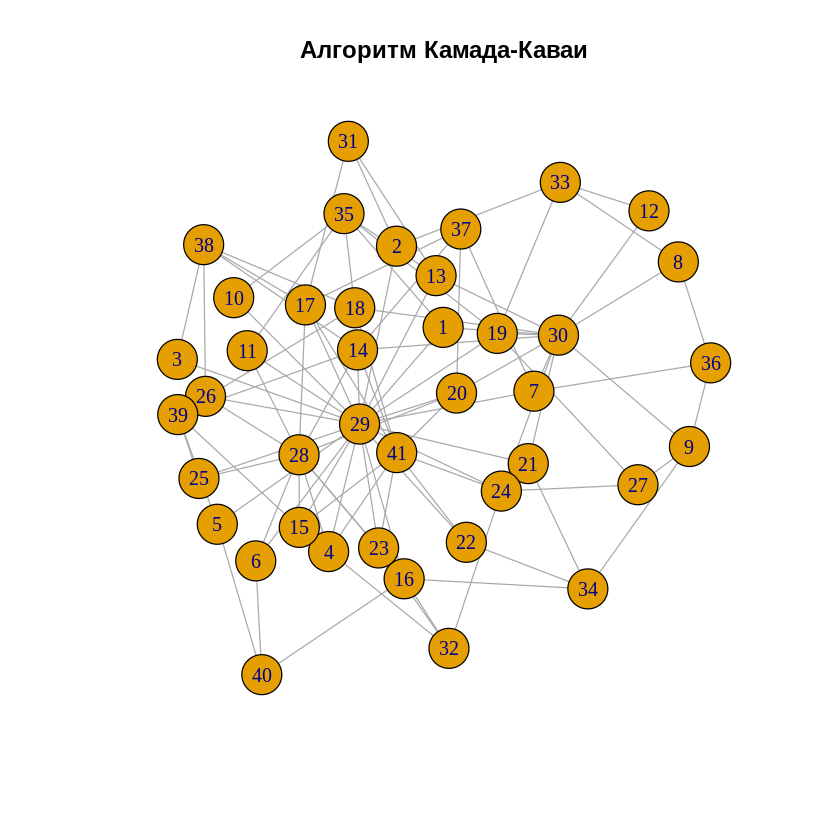

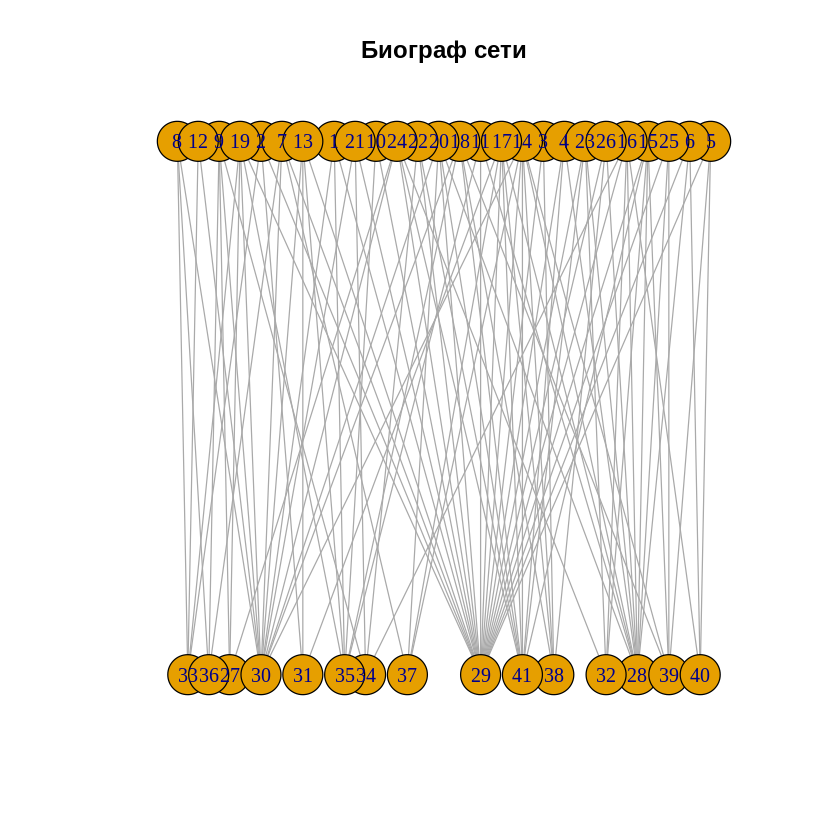

In [51]:
# Переменная хранит адрес файла ceo.csv
url <- "https://drive.google.com/file/d/17YTBt-r4hE1eoXkVWGY-DIiY1jU1f7uQ/view?usp=drive_link"

url <- paste0("https://drive.google.com/uc?id=",
              gsub(".*/d/([^/]+).*", "\\1", url))

data <- read.csv(url,
                 header = FALSE,
                 skip = 9,           # пропуск первых 9 строк с комментариями
                 sep = ",",)

# Создание социоматрицы
sociomatrix2 <- matrix(as.numeric(unlist(data)),
                     nrow = nrow(data),
                     ncol = ncol(data))

print(sociomatrix2)

# Построение биграфа по социоматрице
g2 <- graph_from_biadjacency_matrix(sociomatrix2)

plot(g2, main = "Алгоритм Камада-Каваи", layout = layout_with_kk)


plot(g2, main = "Биограф сети", layout=layout.bipartite)

####  сеть аффилированности в виде двух одномодальных сетей

=== СЕТЬ АКТОРОВ ===
Матрица совместного участия:
      [,1] [,2] [,3] [,4] [,5] [,6] [,7] [,8] [,9] [,10] [,11] [,12] [,13]
 [1,]    0    1    1    1    1    1    2    1    1     2     2     1     3
 [2,]    1    0    1    1    1    1    1    1    0     1     1     1     2
 [3,]    1    1    0    1    1    1    1    0    0     1     1     0     1
 [4,]    1    1    1    0    1    2    1    0    0     1     2     0     1
 [5,]    1    1    1    1    0    2    1    0    0     1     1     0     1
 [6,]    1    1    1    2    2    0    1    0    0     1     2     0     1
 [7,]    2    1    1    1    1    1    0    2    2     1     1     1     2
 [8,]    1    1    0    0    0    0    2    0    2     0     0     2     1
 [9,]    1    0    0    0    0    0    2    2    0     0     0     1     1
[10,]    2    1    1    1    1    1    1    0    0     0     2     0     2
[11,]    2    1    1    2    1    2    1    0    0     2     0     0     2
[12,]    1    1    0    0    0    0    1    2    1

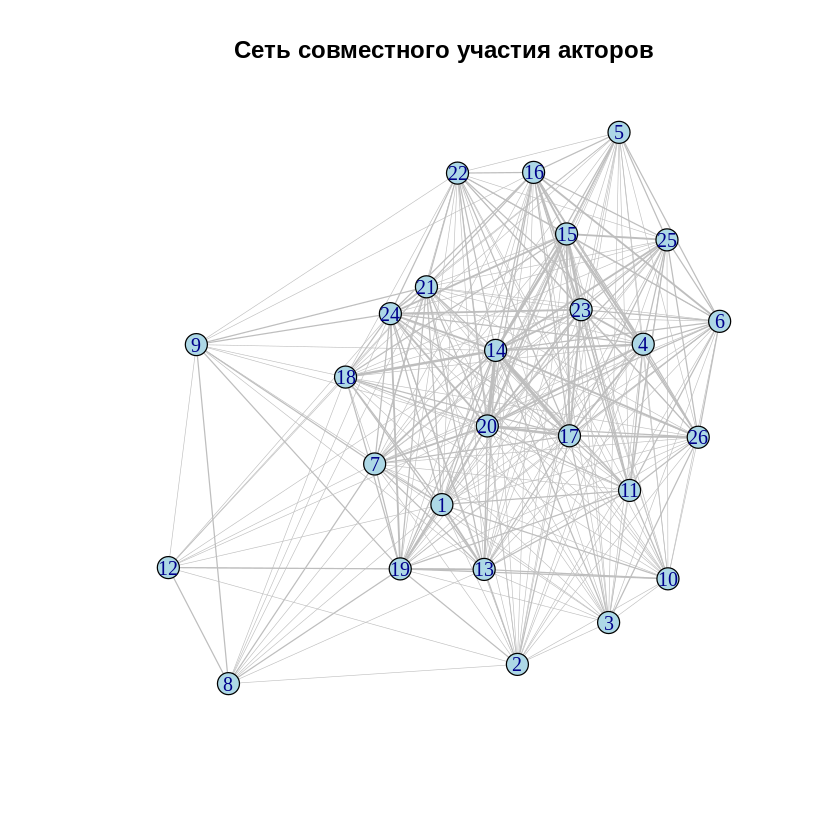

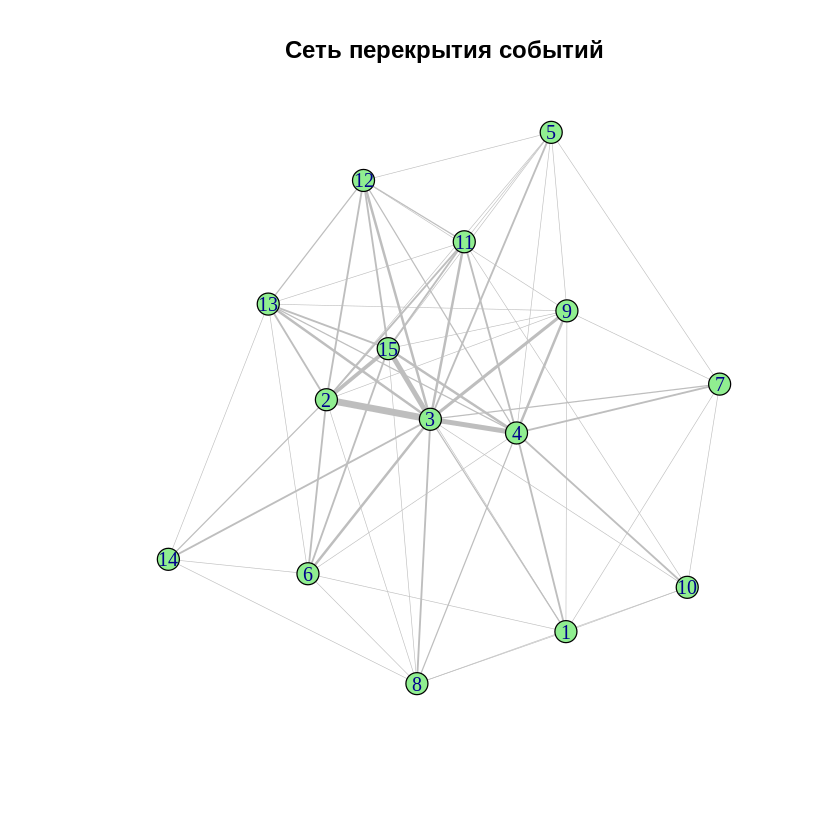

In [53]:
# 1. СЕТЬ АКТОРОВ (совместное участие)
actors_network <- sociomatrix2 %*% t(sociomatrix2)
diag(actors_network) <- 0  # Убираем петли

# Визуализация сети акторов
g_actors <- graph_from_adjacency_matrix(actors_network,
                                        mode = "undirected",
                                        weighted = TRUE,
                                        diag = FALSE)

cat("=== СЕТЬ АКТОРОВ ===\n")
cat("Матрица совместного участия:\n")
print(actors_network)
cat("\nВершин:", vcount(g_actors), "\n")
cat("Ребер:", ecount(g_actors), "\n")
cat("Средний вес связей:", mean(E(g_actors)$weight), "\n")

plot(g_actors,
     vertex.size = 8,
     vertex.color = "lightblue",
     edge.width = E(g_actors)$weight/2,
     edge.color = "gray",
     main = "Сеть совместного участия акторов",
     layout = layout_with_fr)

# 2. СЕТЬ СОБЫТИЙ (перекрытие участников)
events_network <- t(sociomatrix2) %*% sociomatrix2
diag(events_network) <- 0  # Убираем петли

# Визуализация сети событий
g_events <- graph_from_adjacency_matrix(events_network,
                                        mode = "undirected",
                                        weighted = TRUE,
                                        diag = FALSE)

cat("\n=== СЕТЬ СОБЫТИЙ ===\n")
cat("Матрица перекрытия событий:\n")
print(events_network)
cat("\nВершин:", vcount(g_events), "\n")
cat("Ребер:", ecount(g_events), "\n")
cat("Средний вес связей:", mean(E(g_events)$weight), "\n")

plot(g_events,
     vertex.size = 8,
     vertex.color = "lightgreen",
     edge.width = E(g_events)$weight/2,
     edge.color = "gray",
     main = "Сеть перекрытия событий",
     layout = layout_with_fr)

##### Вывод
Сеть имеет чёткую структуру с активным ядром из 5-7 ключевых акторов и 3-4 центральных событий. Высокие веса связей указывают на повторяющееся совместное участие акторов в различных мероприятиях. Сеть событий более сфокусирована, чем сеть акторов, что говорит о специализации мероприятий.

#### Вычисление степени участия и среднее количество событий для каждого актора

In [54]:
# Вычисление степени участия и среднего значения
p <- rowSums(sociomatrix2)
mean_p <- mean(p)

# Вывод результатов
cat("Степени участия акторов:")
p
cat("Среднее количество событий на актор")
round(mean_p, 4)

Степени участия акторов:

[1] 3 3 2 3 3 3 4 3 4 2 3 2 4 7 5 5 6 5 5 5 3 3 4 5 3 3

Среднее количество событий на актор

[1] 3.7692

##### Вывод
Все акторы учавствуют в 2 событиях и почти все в 3 или более. Особо выделяются акторы, учавствующие в 6 и 7 событиях, что значительно выше среднего значения.

#### Вычисление размера и среднего размера для каждого события.

In [55]:
# Вычисление размера и среднего размера
p <- colSums(sociomatrix2)
mean_p <- mean(p)

# Вывод результатов
cat("Размеры событий:")
p
cat("Среднее количество размера событий:")
round(mean_p, 4)

Размеры событий:

[1]  3 11 22 12  3  4  4  4  6  3  4  5  5  3  9

Среднее количество размера событий:

[1] 6.5333

##### Вывод
Большинство событий имеют небольшой размер (около 4 участников), что типично для сети аффилиации. Однако средний размер событий (6.53) значительно превышает медианное значение из-за присутствия нескольких крупных мероприятий. Особенно выделяется событие с 22 участниками, в котором задействовано большинство акторов сети, что указывает на его центральную роль в поддержании связей между различными группами.

#### Вычисление плотности для отношения совместного участия акторов и отношения перекрытия

In [57]:
density_ceo  <- edge_density(g_actors)
density_club <- edge_density(g_events)

cat("Плотность сети совместного участия CEO: ", round(density_ceo, 4), "\n")
cat("Плотность сети перекрытия клубов:       ", round(density_club, 4), "\n")

Плотность сети совместного участия CEO:  0.8738 
Плотность сети перекрытия клубов:        0.6286 


##### Вывод
Высокая плотность сети акторов (0.87) указывает на их активное совместное участие в разных событиях, формируя плотную социальную структуру. Умеренная плотность сети событий (0.63) показывает, что мероприятия имеют специализированные составы участников с заметным, но не полным перекрытием аудиторий.

#### Определения диметра сети

In [58]:
cat("Диаметр всей сети: ", diameter(g2), "\n")
cat("Диаметр совместного участия CEO: ", diameter(g_actors), "\n")
cat("Диаметр перекрытия клубов: ", diameter(g_events), "\n")

Диаметр всей сети:  5 
Диаметр совместного участия CEO:  2 
Диаметр перекрытия клубов:  4 


#### Логарифм

In [62]:
n_events <- ncol(sociomatrix2)
odds_ratio_matrix <- matrix(0, n_events, n_events)

for(i in 1:n_events){
  for(j in 1:n_events){
    if(i != j){
      a <- sum(sociomatrix2[,i] == 1 & sociomatrix2[,j] == 1)
      b <- sum(sociomatrix2[,i] == 1 & sociomatrix2[,j] == 0)
      c <- sum(sociomatrix2[,i] == 0 & sociomatrix2[,j] == 1)
      d <- sum(sociomatrix2[,i] == 0 & sociomatrix2[,j] == 0)

      # Добавляем поправку 0.5 к каждой ячейке для избежания нулей
      odds_ratio <- ((a+0.5)*(d+0.5))/((b+0.5)*(c+0.5))
      odds_ratio_matrix[i,j] <- log(odds_ratio)
    }
  }
}

diag(odds_ratio_matrix) <- 0

cat("Матрица логарифмов отношений шансов (первые 5x5):\n")
print(round(odds_ratio_matrix, 2))
cat("\nМаксимальное значение:", round(max(odds_ratio_matrix), 2))
cat("\nМинимальное значение:", round(min(odds_ratio_matrix), 2))

Матрица логарифмов отношений шансов (первые 5x5):
       [,1]  [,2]  [,3]  [,4]  [,5]  [,6]  [,7]  [,8]  [,9] [,10] [,11] [,12]
 [1,]  0.00 -1.86 -1.26  2.37 -0.18  1.26  1.26  1.26  0.70  1.64 -0.48 -0.73
 [2,] -1.86  0.00  2.20 -1.98 -0.26  1.38 -2.20 -0.67 -1.30 -1.86  1.38  0.80
 [3,] -1.26  2.20  0.00 -2.73  0.48  0.78 -2.10 -0.87 -0.31 -2.66  0.78 -0.57
 [4,]  2.37 -1.98 -2.73  0.00 -0.43 -0.85  1.20  0.17  0.97  2.37  1.20 -0.25
 [5,] -0.18 -0.26  0.48 -0.43  0.00 -0.48  1.26 -0.48  0.70 -0.18  1.26  0.96
 [6,]  1.26  1.38  0.78 -0.85 -0.48  0.00 -0.78  0.87 -1.27 -0.48 -0.78 -1.04
 [7,]  1.26 -2.20 -2.10  1.20  1.26 -0.78  0.00 -0.78  0.31  1.26 -0.78 -1.04
 [8,]  1.26 -0.67 -0.87  0.17 -0.48  0.87 -0.78  0.00 -1.27  1.26 -0.78 -1.04
 [9,]  0.70 -1.30 -0.31  0.97  0.70 -1.27  0.31 -1.27  0.00 -0.96 -1.27  0.00
[10,]  1.64 -1.86 -2.66  2.37 -0.18 -0.48  1.26  1.26 -0.96  0.00  1.26 -0.73
[11,] -0.48  1.38  0.78  1.20  1.26 -0.78 -0.78 -0.78 -1.27  1.26  0.00  1.72
[12,] -0.73  0

##### Вывод
Положительные значения отношения шансов (например, 2.37 между событиями 1-4) указывают на высокую вероятность совместного участия акторов в этих событиях. Отрицательные значения (например, -2.73 между событиями 3-4) свидетельствуют о взаимном исключении участников. Максимальное значение 2.37 выявлено между событиями 1 и 4, что означает сильную притягивающую связь, в то время как минимальное -2.73 между событиями 3 и 4 показывает конкурентные отношения. Матрица демонстрирует смешанную структуру сети с наличием как притягивающих, так и конкурирующих пар событий.

## Выводы
Исследование сети аффилиации, включающей 26 CEO и 15 клубов, выявило выраженную структуру связей. Бипартитный граф был преобразован в две взвешенные одномодальные сети: совместного участия руководителей и перекрытия клубов. Вес связей отражает количество общих клубов для пар CEO и число общих участников для пар клубов. Графы и матрицы смежности демонстрируют плотное ядро взаимосвязанных элементов с высокой интенсивностью связей. Значения плотности обеих сетей значительны, что свидетельствует о тесной взаимосвязанности элементов системы.

Алгоритмы Louvain, InfoMap и точной оптимизации модулярности независимо выделили 7 сообществ с одинаковой модулярностью Q ≈ 0.364, что подтверждает стабильность структуры сети. Данное значение указывает на наличие чёткой групповой организации.

Участие CEO распределено неравномерно: в среднем каждый участвует в 4–5 клубах. Анализ логарифмов отношений шансов между клубами показал неоднородность ассоциаций: наряду с клубами, привлекающими схожие группы участников (положительные ассоциации), существуют пары с разделённой аудиторией (отрицательные ассоциации), что, вероятно, отражает функциональные различия или отраслевую специализацию мероприятий.

